## **Problem Statement**
* ### Company's 2014-2018 sales data to identify key revenue and profit drivers across products, channels and regions, uncover seasonal trends and outliers and align performance against budgets. Use these insights to optimize pricing, promotions and market expansion for sustainable growth and reduced concentration risk.

# Learnings
* While removing a 'row' from a DataFrame, we should apply **'.reset_index(Drop = True)'** to maintain clean and sequential data
*

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Dataset
sheets = pd.read_excel('/content/drive/MyDrive/Regional_sale_Analysis_Dataset/Regional Sales Dataset.xlsx' , sheet_name = None)

In [3]:
# Assign dataframes to each sheet
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [4]:
# Shape of all the Dataframes
print(f'df_sales shape: {df_sales.shape}')
print(f'df_customers shape: {df_customers.shape}')
print(f'df_products shape: {df_products.shape}')
print(f'df_regions shape: {df_regions.shape}')
print(f'df_state_reg shape: {df_state_reg.shape}')
print(f'df_budgets shape: {df_budgets.shape}')

df_sales shape: (64104, 12)
df_customers shape: (175, 2)
df_products shape: (30, 2)
df_regions shape: (994, 15)
df_state_reg shape: (49, 3)
df_budgets shape: (30, 2)


## Using 'head()' function to take a quick look over the sheets data

In [5]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [6]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [7]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [8]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [9]:
df_state_reg.head(5)

# Problem : Column/Attribue names became rows

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [10]:
# Assigning column names properly
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop = True)

# Note : it's generally good practice to reset the index after dropping rows to ensure a clean, sequential index,
#        especially if you plan on performing operations that rely on index-based alignment or iteration.

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [11]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


## 'Null' value check now

In [12]:
df_sales.isnull().sum()    # 'sum()' function will do summation over all False = 0 and True = 1 values in all columns, hence 'Null' value check will be done

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [13]:
df_customers.isnull().sum()

,0
Customer Index,0
Customer Names,0


In [14]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [15]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [16]:
df_state_reg.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [17]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


## Data Cleaning and Wrangling

### Analysing relationships between tables and then merging
- Sales Orders ( Customer Name Index ) and Customers ( Customer Index )

In [18]:
# Merge 'Sales Orders' with 'Customners' table
df = df_sales.merge(df_customers , how = 'left' , left_on = 'Customer Name Index' , right_on = 'Customer Index')

In [19]:
# Merge 'Sales Orders' with 'Products'
df = df.merge(df_products, how = 'left' , left_on = 'Product Description Index' , right_on = 'Index')

In [20]:
# Merge 'Sales Orders' with 'Regions'
df = df.merge(df_regions , how = 'left' , left_on = 'Delivery Region Index' , right_on = 'id')

In [21]:
# Merge 'Sales Orders' with 'State Regions'
df = df.merge(df_state_reg[['State Code' , 'Region']] , how = 'left' , left_on = 'state_code' , right_on = 'State Code')

In [22]:
# Merge 'Sales Orders' with '2017 Budgets'
df = df.merge(df_budgets , how = 'left' , on = 'Product Name')

In [23]:
# Exporting DataFrame to .csv
df.to_csv('file.csv')

In [24]:
# Customer Index
# Index
# id
# State Code

# clean up redundant columns
cols_to_drop = ['Customer Index' , 'Index' , 'id' , 'State Code']
df = df.drop(columns = cols_to_drop , errors = 'ignore')

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [25]:
# convert all column names to 'lowercase' to maintain the consistency and easier use
df.columns = df.columns.str.lower()     # '.str.lower()' is applied on the column names present in the list after applying 'df.columns'

df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [26]:
# Keep the important columns and delete the columns those are not needed
cols_to_keep = ['ordernumber' ,
                'orderdate' ,
                'customer names' ,
                'channel' ,
                'product name' ,
                'order quantity' ,
                'unit price' ,
                'line total' ,
                'total unit cost' ,
                'state_code' ,
                'county' ,
                'state' ,
                'region' ,
                'latitude' ,
                'longitude' ,
                '2017 budgets']

In [27]:
df = df[cols_to_keep]

In [28]:
df.head()

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [29]:
# Rename the column names for easy understanding and fetching
df = df.rename(columns = {
    'ordernumber': 'order_number',
    'orderdate' : 'order_date',
    'customer names' : 'customer_name',
    'channel' : 'channel',
    'product name' : 'product_name',
    'order quantity' : 'order_quantity',
    'unit price' : 'unit_price',
    'line total' : 'revenue',
    'total_unit_cost' : 'cost',
    'state_code' : 'state',
    'state' : 'state_name',
    'latitude' : 'lat',
    'longitude' : 'lon',
    '2017 budgets' : 'budget'
})

df.head(1)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231


In [30]:
# We only have 'budget' of 2017 so we'll blank out 'budget' for non-2017 orders
df.loc[df['order_date'].dt.year != 2017 , 'budget'] = pd.NA


# checking the 'budget' for non-2017 years
display(df[['order_date' , 'product_name' , 'revenue' , 'budget']].head(5))

display(df[['order_date' , 'product_name' , 'revenue' , 'budget']].tail(5))

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


,order_date,product_name,revenue,budget
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN
64103,2018-02-28,Product 15,7986.4,NaN


In [31]:
# overview of data using 'info()' function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer_name    64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total unit cost  64104 non-null  float64       
 9   state            64104 non-null  object        
 10  county           64104 non-null  object        
 11  state_name       64104 non-null  object        
 12  region           64104 non-null  object        
 13  lat              64104 non-null  float64       
 14  lon              64104 non-null  float

In [32]:
# fetch only 2017 data for further analysis
df_2017 = df[df['order_date'].dt.year == 2017]

df_2017.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,lon,budget
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565


# Feature Engineering : To create new Features(columns) or to tweak(to change) an existing column

* ### Finding the Profit from the 'revenue', 'order_quantity' and 'cost' as : **Profit = Revenue - Order Quantity * Total_unit_cost**

In [33]:
df['total_cost'] = df['order_quantity'] * df['total unit cost']

In [34]:
df['profit'] = df['revenue'] - df['total_cost']

df['profit_margin_%'] = (df['profit'] / df['revenue']) * 100

df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,lon,budget,total_cost,profit,profit_margin_%
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


# Exploratory Data Analysis (EDA)

* #### As we don't have target variable here on which we can do study with respect to other columns, so we need to perform some cunning relationship plots.

### 1. Each month sales over all years

Goal: Track revenue trends over time to detect seasonality or sales spikes

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers to highlight monthly revenue points clearly

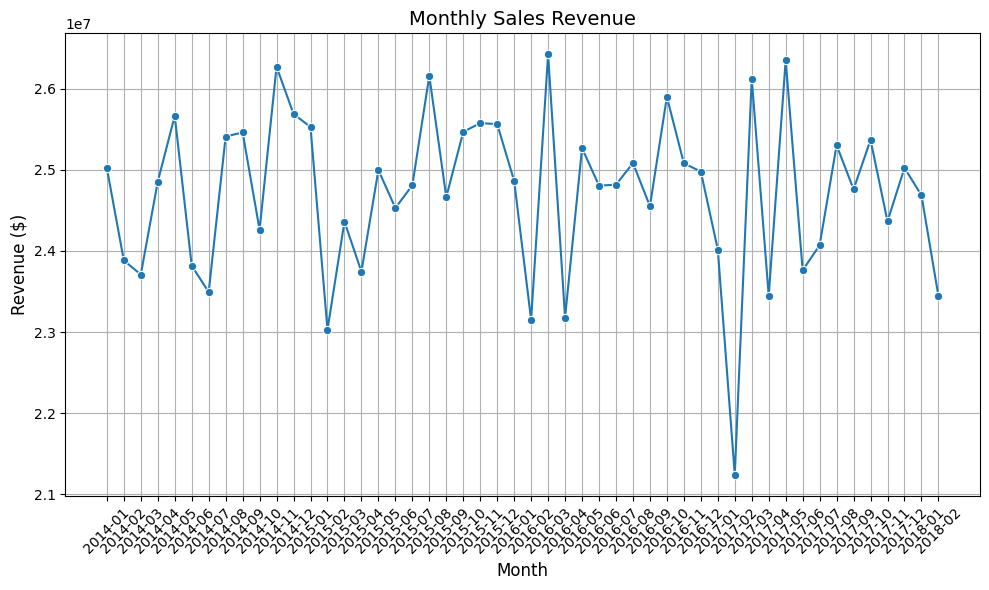

In [35]:
# Convert 'order_date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract year and month for grouping
df['year_month'] = df['order_date'].dt.to_period('M')

# Aggragate revenue by year_month
monthly_sales = df.groupby('year_month')['revenue'].sum().reset_index()

# Convert 'year_month' back to 'string' for plotting
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

# Create the line chart
plt.figure(figsize = (10,6))                        # for making 'x' axis bigger than 'y' axis for time-series like analysis
sns.lineplot(data = monthly_sales , x = 'year_month' , y = 'revenue' , marker = 'o')
plt.title('Monthly Sales Revenue' , fontsize = 14)
plt.xlabel('Month' , fontsize = 12)
plt.ylabel('Revenue ($)' , fontsize = 12)
plt.xticks(rotation = 45)                            # x-labels rotates to 45* rightward to see every month name properly without overlapping
plt.grid(True)
plt.tight_layout()                                   # This automatically adjusts plot parameters for a tight layout, preventing 'labels' and 'titles' from being cut off or overlapping.

# Show the plot
plt.show()

### INSIGHTS
- Sales consistently cycle between \$24 M and \$26 M, with clear peaks in late spring to early summer (May–June) and troughs each January.  

- The overall trend remains stable year over year, reflecting a reliable seasonal demand pattern.  

- However, the sharp revenue drop in early 2017 stands out as an outlier, warranting closer investigation into potential causes such as market disruptions or mistimed promotions.

### 2. Overall(grouped) monthly sales over each year

Goal: Highlight overall seasonality patterns by aggregating sales across all years for each calendar month

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers, months ordered January to December based on month number

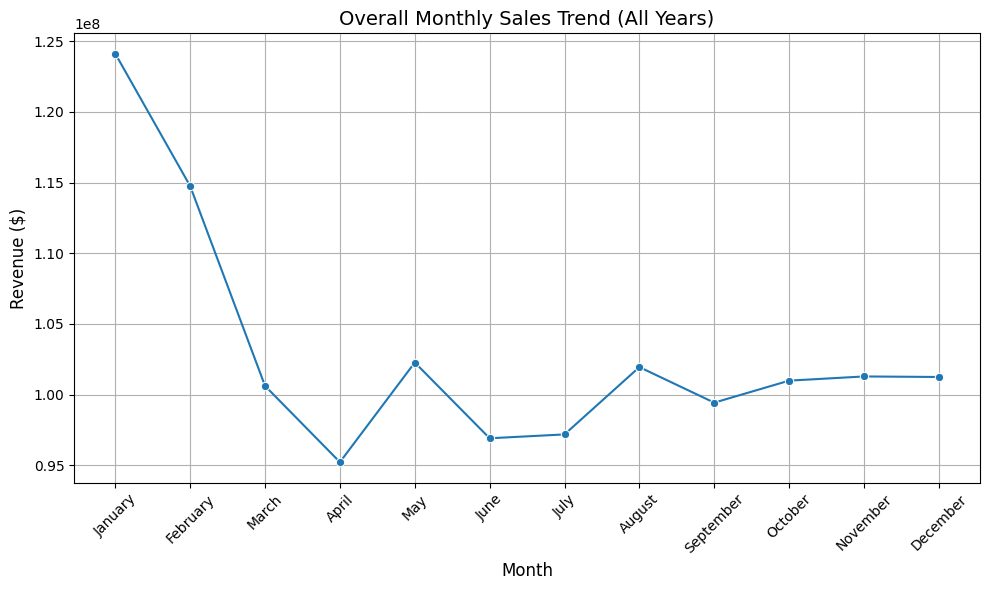

In [36]:
# Convert 'order_date' to 'datetime'
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract month name and month number for grouping and sorting
df['month'] = df['order_date'].dt.strftime('%B')                                  # %B is a format code for the full month name.
df['month_num'] = df['order_date'].dt.month                                       # Extract month as a number (1-12)

# Aggragate 'revenue' by month name and month number across all years
# Grouping by both ensures that the month name corresponds to its number
monthly_trend = df.groupby(['month_num', 'month'])['revenue'].sum().reset_index()

# Sort months by their numerical order (already present due to month_num column)
monthly_trend = monthly_trend.sort_values('month_num')

# Drop the temporary 'month_num' column as it's no longer needed for plotting
monthly_trend = monthly_trend.drop(columns='month_num')

# Create the line chart
plt.figure(figsize = (10 , 6))
sns.lineplot(data = monthly_trend , x = 'month' , y = 'revenue' , marker = 'o')
plt.title('Overall Monthly Sales Trend (All Years)' , fontsize = 14)
plt.xlabel('Month' , fontsize = 12)
plt.ylabel('Revenue ($)' , fontsize = 12)
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

#### Note : In above graph, due to inconsistent data for the year 2018 'Jan' and 'Feb', analysis shows highest revenue in 'Jan' month and lowest in 'April' which is not True if we calculate monthly revenue over all years in Excel sheet.So, we need to remove 'Jan' and 'Feb' months of year '2018'.

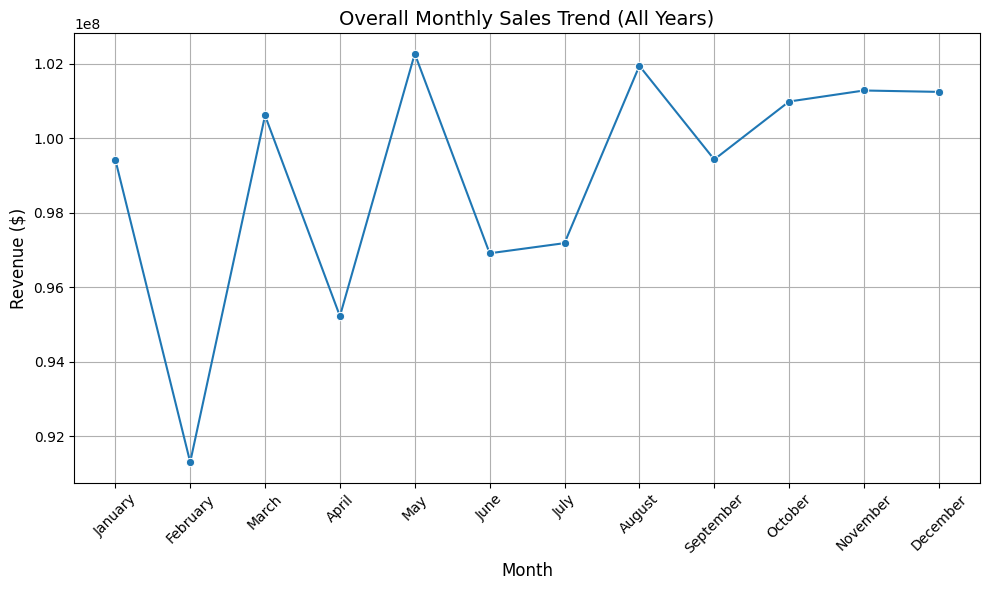

In [37]:
# Removing 2018 'Jan and Feb' months from the 'order_date' column and making new DataFrame as 'df_new'
df_new = df[~((df['order_date'].dt.year == 2018) & df['order_date'].dt.month.isin([1 , 2]))].copy()

# Convert 'order_date' to 'datetime' for new DataFrame 'df_new'
df_new['order_date'] = pd.to_datetime(df_new['order_date'])

# Extract month name and month number for grouping and sorting
df_new['month'] = df_new['order_date'].dt.strftime('%B')                     # '%B' is a format code for the full month name.
df_new['month_num'] = df_new['order_date'].dt.month                          # Extract month as a number (1-12)

# Aggragate 'revenue' by month name and month number across all years
# Grouping by both ensures that the month name corresponds to its number
monthly_trend = df_new.groupby(['month_num', 'month'])['revenue'].sum().reset_index()

# Sort months by their numerical order (already present due to month_num column)
monthly_trend = monthly_trend.sort_values('month_num')

# Drop the temporary 'month_num' column as it's no longer needed for plotting
monthly_trend = monthly_trend.drop(columns='month_num')

# Create the line chart
plt.figure(figsize = (10 , 6))
sns.lineplot(data = monthly_trend , x = 'month' , y = 'revenue' , marker = 'o')
plt.title('Overall Monthly Sales Trend (All Years)' , fontsize = 14)
plt.xlabel('Month' , fontsize = 12)
plt.ylabel('Revenue ($)' , fontsize = 12)
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### INSIGHTS

- Across all years, 'May' begins strong with roughly \$102 M, followed by a steep decline through February's low point (≈\$90 M).

- Sales rebound in May and August (≈\$102 M) before settling into a plateau of \$99-101 M from September to December.

- This pattern reveals a strong post-New Year surge, a spring dip and a mid-summer bump each calendar year.

### 3. Finding 'top-10' products' by 'revenue(in millions)'

Goal: Identify the highest-grossing products to focus marketing and inventory efforts

Chart: Horizontal bar chart

EDA Type: Univariate ( coz we are only analysing 'revenue' with categorical 'product_name' values which are acting as prodcut identifiers. We are not analysing any relationship between two columns i.e. 'Product_name' and 'revenue'.

Structure: Bars sorted descending to show top 10 products with revenue scaled in millions

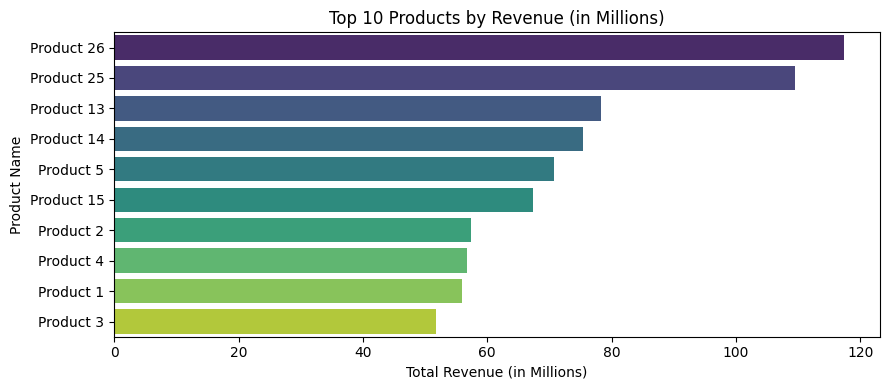

In [38]:
# Calculate total revenue for each product and convert values to millions
top_prod = df.groupby('product_name')['revenue'].sum() / 1000000            # 'top_prod' becomes series here as we have not used 'reset_index()' function

# Select the top 10 products by revenue
top_prod = top_prod.nlargest(10)              # nlargest is series method for fetching 'n' largest elements. It first sort series in desending order then fetches 'n' largest value rows

# Set the figure size for clarity
plt.figure(figsize=(9, 4))

# Plot a horizontal bar chart: x-axis as revenue in millions, y-axis as product names
sns.barplot(
    x=top_prod.values,    # X-axis: revenue values in millions
    y=top_prod.index,     # Y-axis: product names
    palette='viridis',    # Applies a 'viridis' color scheme to the bars
    hue=top_prod.index,   # Assign 'y' variable to 'hue' explicitly to suppress 'FutureWarning' coz 'y' is categorical
    legend=False          # Set legend to False coz y-values are already present on y-axis
)

# Add title and axis labels
plt.title('Top 10 Products by Revenue (in Millions)')  # Main title
plt.xlabel('Total Revenue (in Millions)')              # X-axis label
plt.ylabel('Product Name')                             # Y-axis label

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

### INSIGHTS
- Products 26 and 25 pull away at \$118 M and \$110 M, with a sharp drop to \$78 M for Product 13 and a tight mid-pack at \$68–\$75 M.  

- The bottom four cluster at \$52–\$57 M, highlighting similar constraints.  

- Focus on growth pilots for the mid-tier and efficiency gains for the lower earners to drive significant lifts.  

### 4. Finding 'top-10' products' by 'Average Profit Margin'

Goal: Compare average profitability across products to identify high-margin items

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with average profit margin values

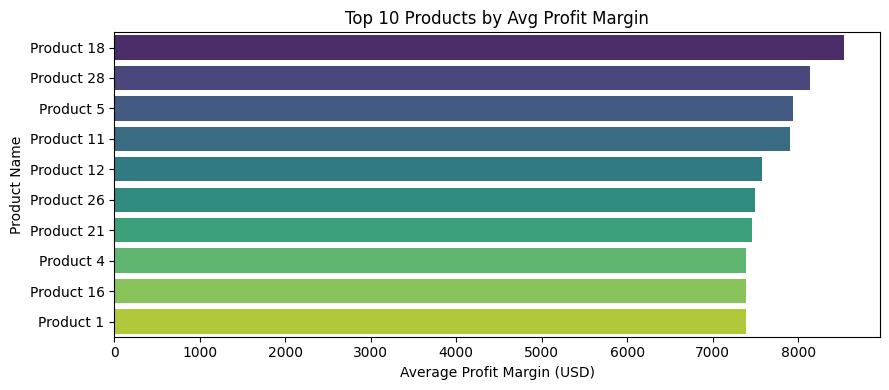

In [39]:
# Compute average profit per product and take the top 10
top_margin = (                            # 'top_margin' becomes series here coz we haven't used 'reset_index()' function
    df.groupby('product_name')['profit']
      .mean()                             # Calculate mean profit for each product
      .sort_values(ascending=False)       # Sort from highest to lowest average profit
      .head(10)                           # Keep only the top 10 products
)

# Set the figure size for clarity
plt.figure(figsize=(9, 4))

# Plot a horizontal bar chart
sns.barplot(
    x=top_margin.values,     # X-axis: average profit values
    y=top_margin.index,      # Y-axis: product names
    palette='viridis',       # Color palette for the bars
    hue = top_margin.index,
    legend = False
)

# Add title and axis labels
plt.title('Top 10 Products by Avg Profit Margin')  # Chart title
plt.xlabel('Average Profit Margin (USD)')          # X-axis label
plt.ylabel('Product Name')                         # Y-axis label

# Adjust layout to prevent clipping and show the plot
plt.tight_layout()
plt.show()

### INSIGHTS

- Products 18 and 28 lead with average profit margins of approximately \$8.0-8.3 K, followed closely by Product 5 and Product 11 around \$7.9-8.0 K.

- Mid-tier performers like Products 12, 26, and 21 cluster in the \$7.7-7.8 K range, while the bottom tier (Products 4, 16, and 1) fall between \$7.4-7.6 K.

- Focusing on margin optimization strategies from top performers, may help elevate overall product profitability.

### 5. Average Order Value (AOV) : It tells the Average spending of the customer over an order

Goal: Understand distribution of order values to identify typical spending levels and outliers

Chart: Histogram

EDA Type: Univariate

Structure: Histogram with 50 bins, colored bars with edge highlights to show frequency of order values

In [60]:
aov = df.groupby('order_number')['revenue'].sum()
aov

aov.sort_values(ascending = False)

,revenue
order_number,
SO - 0004451,472269.6
SO - 0005366,472269.6
SO - 0008500,472269.6
SO - 0001869,471304.8
SO - 0001909,470822.4
...,...
SO - 0008483,5025.0
SO - 0010111,5025.0
SO - 0005349,5025.0


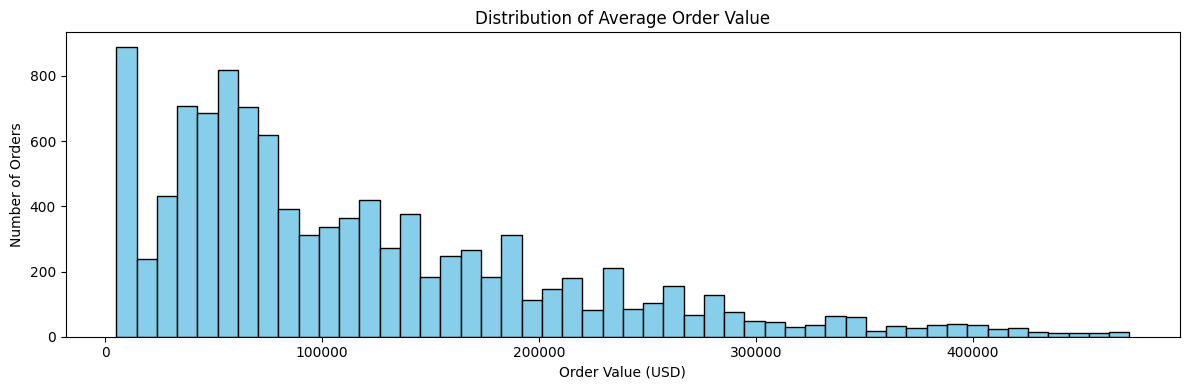

In [59]:
# Calculate the total revenue for each order to get the order value
aov = df.groupby('order_number')['revenue'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(12, 4))

# Plot a histogram of order values
plt.hist(
    aov,               # Data: list of order values
    bins=50,           # Number of bins to group order-values ranging from $0 - $500k. Bin size = $500k / 50 = $10k
    color='skyblue',   # Fill color of the bars
    edgecolor='black'  # Outline color of the bars
)

# Add title and axis labels for context
plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

### INSIGHTS
- The order-value distribution is heavily right-skewed, with most orders clustering between \$20K - \$120K and a pronounced mode around \$50 K-\$60 K.  

- A long tail of high-value transactions extends up toward \$400 K-\$500 K, but these large orders represent only a small share of total volume.  

- Most of the customers are going for cheap value orders ranging between $0 - $100k

### 6. Sales by Channel

Goal: Show distribution of total sales across channels to identify dominant sales routes

Chart: Pie chart

EDA Type: Univariate

Structure: Pie segments with percentage labels, colors for clarity, start angle adjusted

,revenue
channel,
Wholesale,668197244.4
Distributor,387139788.6
Export,180631866.0


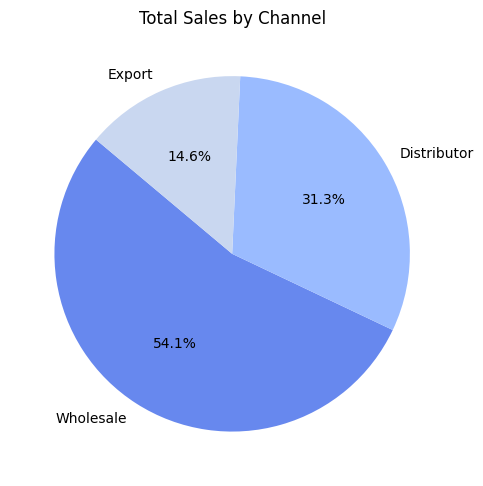

In [73]:
# Group revenue by sales channel and sort descending
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)    # 'chan_sales' is series now, coz 'reset_index()' function is not used
display(chan_sales)

# Set figure size for the pie chart
plt.figure(figsize=(5, 5))

# Plot pie chart with percentage labels and a defined start angle
plt.pie(
    chan_sales.values,                   # Data: revenue values per channel
    labels=chan_sales.index,             # Labels: channel names
    autopct='%1.1f%%',                   # Display percentages with one decimal
    startangle=140,                      # Rotate chart so first slice(wholesale wali line) starts at 140 degrees from x-axis(0 degree)
    colors=sns.color_palette('coolwarm') # Color palette for slices
)

# Add title for context
plt.title('Total Sales by Channel')

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the chart
plt.show()

### INSIGHTS
- Wholesale accounts for 54 % of sales, with distributors at ~31 % and exports at ~15 %, underscoring reliance on domestic bulk channels.  

- To diversify revenue and mitigate(distribute) concentration risk, prioritize expanding export initiatives - through targeted overseas(international) marketing and strategic partner relationships.

### 7. Unit Price Distribution per product

Goal: Compare pricing variability across different products to identify price consistency and outliers

Chart: Boxplot

EDA Type: Bivariate

Structure: Boxplot with rotated labels to display unit price spread per product

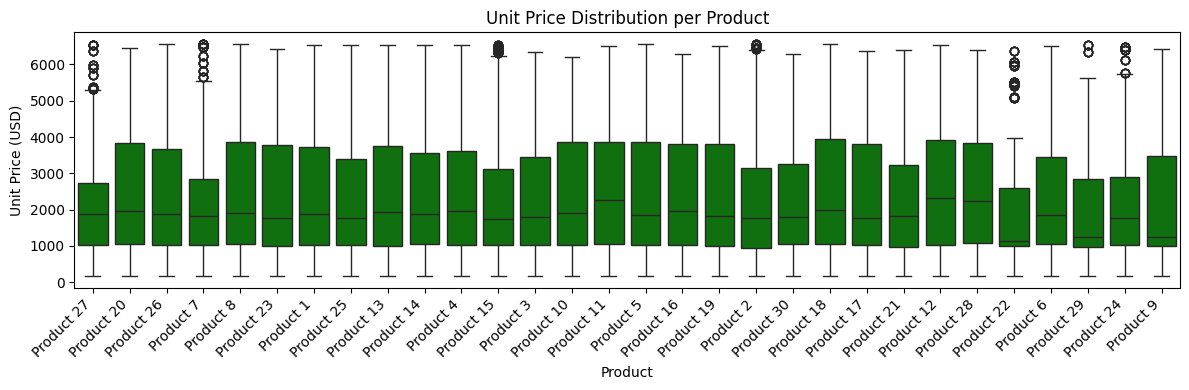

In [79]:
# Set figure size for clarity
plt.figure(figsize=(12,4))

# Create a boxplot of unit_price by product_name
sns.boxplot(
    data=df,
    x='product_name',    # X-axis: product categories
    y='unit_price',      # Y-axis: unit price values
    color='g'            # Box color
)

# Add title and axis labels
plt.title('Unit Price Distribution per Product')   # Chart title
plt.xlabel('Product')                              # X-axis label
plt.ylabel('Unit Price (USD)')                     # Y-axis label

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')                # ha='right' -> horizontal alignment

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

### INSIGHTS
- Products 8, 17, 27, 20 and 28 show high-end revenue spikes—well above their upper whiskers—likely due to bulk orders, special-edition releases or premium bundles that temporarily inflate earnings.  

- In contrast, deep low-end outliers (near \$0-\$100) on Products 20 and 27 suggest promotional giveaways or test SKUs(Storage Keeping Units - unique alpha-numeric code) that pull down average prices.  

- To ensure accurate margin and pricing assessments, exclude these outlier transactions from average calculations.  

- Then assess whether such anomalies warrant formalization as ongoing promotional strategies or should be phased out to stabilize pricing performance.


### 8. Top 10 States by Revenue and Order Count

Goal: Identify highest revenue-generating states and compare their order volumes

Chart: Two bar charts

EDA Type: Multivariate

Structure: First chart shows top 10 states by revenue (in millions) and second shows top 10 states by number of orders

,revenue,orders
state_name,,
California,228785436.0,7613
Illinois,111050965.7,4607
Florida,90204679.5,3836
Texas,84011903.0,3582
New York,55534960.0,2543
Indiana,54601690.2,2544
New Jersey,46830956.5,2162
Connecticut,44251228.7,2073
Michigan,39025315.8,1889


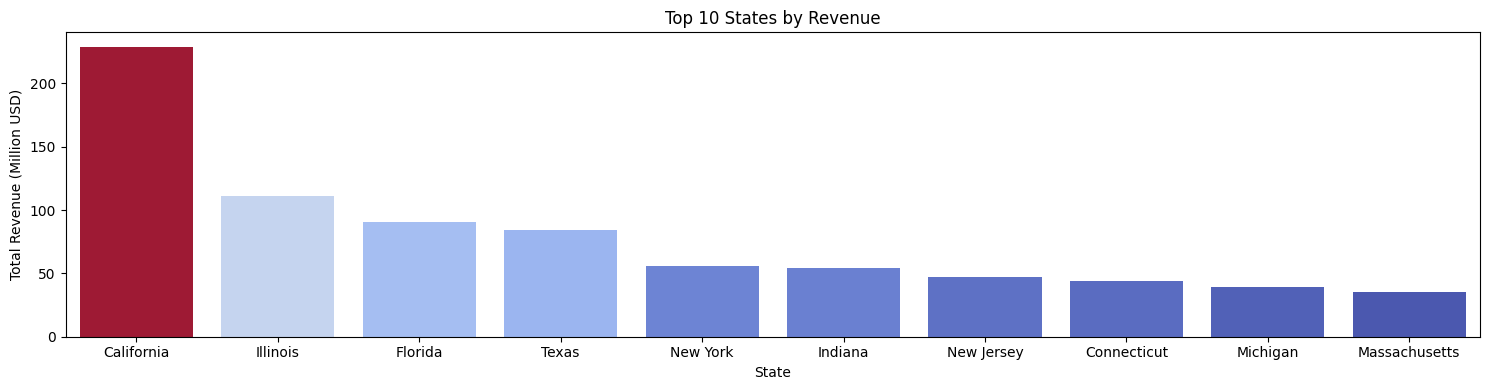

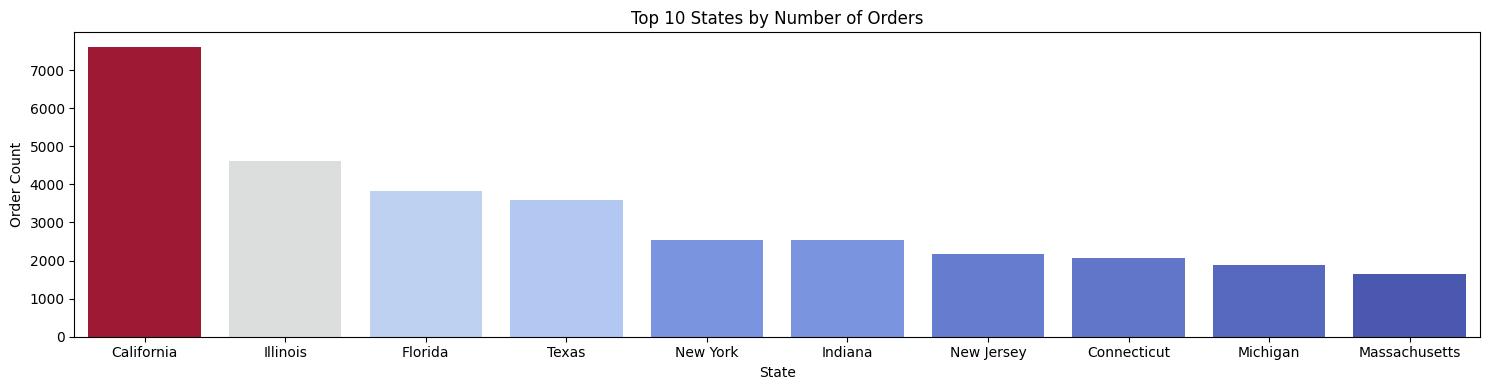

In [85]:
# Aggregate total revenue and unique order count per state
state_rev = df.groupby('state_name').agg(           # .agg(...) : This is an aggregation function that allows you to perform multiple aggregations simultaneously.
    revenue=('revenue', 'sum'),                     # Sum up revenue per state
    orders=('order_number', 'nunique')              # Count unique orders per state. States which have single or same orders are filtered out.
).sort_values('revenue', ascending=False).head(10)  # Keep top 10 by revenue

display(state_rev)

# Plot 1: Top 10 states by revenue (scaled to millions)
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                    # X-axis: state names
    y=state_rev['revenue'] / 1e6,         # Y-axis: revenue in millions
    palette='coolwarm',                   # Color palette
    hue = state_rev['revenue'] / 1e6,
    legend = False
)
plt.title('Top 10 States by Revenue')     # Chart title
plt.xlabel('State')                       # X-axis label
plt.ylabel('Total Revenue (Million USD)') # Y-axis label
plt.tight_layout()                        # Adjust layout
plt.show()                                # Display the plot

# Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                    # X-axis: state names
    y=state_rev['orders'],                # Y-axis: order counts
    palette='coolwarm',                   # Color palette
    hue = state_rev['orders'],
    legend = False
)
plt.title('Top 10 States by Number of Orders')   # Chart title
plt.xlabel('State')                              # X-axis label
plt.ylabel('Order Count')                        # Y-axis label
plt.tight_layout()                               # Adjust layout
plt.show()

### INSIGHTS

- California state leads for both 'Revenue' and 'Number of Orders'
- Massachusetts lasts in the game
- Both the graphs have same countries in their x-axis as 'Revenue' and 'Number of Orders' has a directly proportional relation.

### 9. Average Profit margin by Channel

,profit_margin_%
channel,
Export,37.932704
Distributor,37.557091
Wholesale,37.087236


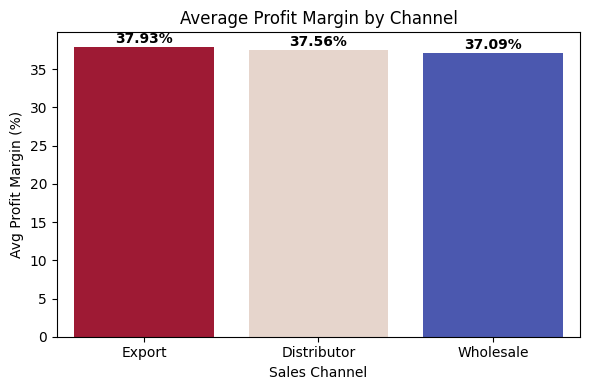

In [90]:
# Compute average profit margin percentage for each channel
channel_margin = (
    df.groupby('channel')['profit_margin_%']   # Group by sales channel
      .mean()                                  # Calculate mean profit margin %
      .sort_values(ascending=False)            # Sort channels from highest to lowest margin
)

display(channel_margin)

# Set the figure size for clarity
plt.figure(figsize=(6, 4))

# Plot a bar chart of average profit margin by channel
ax = sns.barplot(
    x=channel_margin.index,                    # X-axis: channel names
    y=channel_margin.values,                   # Y-axis: average profit margin values of each channel
    palette='coolwarm',                        # Color palette for bars
    hue = channel_margin.values,
    legend = False
)

# Add chart title and axis labels
plt.title('Average Profit Margin by Channel')  # Main title
plt.xlabel('Sales Channel')                    # X-axis label
plt.ylabel('Avg Profit Margin (%)')            # Y-axis label

# Annotate each bar with its exact margin percentage
for i, v in enumerate(channel_margin.values):
    ax.text(                # ax.text : axis object add text to the plot
        i,                  # X position of text (bar index/position -> ith bar)
        v + 0.5,            # Y position of text (bar height + small offset)
        f"{v:.2f}%",        # Text label showing percentage with two decimals -> {v: .2f} where 'v' is value and '.2f' is two-decimals
        ha='center',        # Center-align the text horizontally
        fontweight='bold'   # Bold font for readability
    )

# Adjust layout to prevent clipping and display the plot
plt.tight_layout()
plt.show()

### INSIGHTS
- Export leads with a 37.93 % average margin, closely followed by Distributor (37.56 %) and Wholesale (37.09 %).  

- The tiny spread (<0.5 %) between channels shows consistently strong profitability across all channels.  

- This uniformity implies well-controlled costs and pricing power everywhere.  

- To maximize returns, push volume growth in Export while maintaining efficiency in Distributor and Wholesale.

### 10. Top and Bottom 10 customers by Revenue

Goal: Identify your highest- and lowest-revenue customers to tailor engagement strategies

Chart: Side-by-side horizontal bar charts

EDA Type: Multivariate

Structure: Left chart shows top 10 customers by revenue (in millions), right chart shows bottom 10 customers by revenue (in millions)

,revenue
customer_name,
Aibox Company,12641251.8
State Ltd,12220639.2
Pixoboo Corp,10986459.0
Organon Corp,10955826.6
Realbuzz Ltd,10753299.0
WOCKHARDT Group,10701963.6
Kare Corp,10635633.6
Colgate-Pa Group,10107003.6
Golden Corp,10007669.4


,revenue
customer_name,
BB17 Company,4034673.0
Yodoo Ltd,4372755.0
Mycone Ltd,4534238.4
Voonyx Group,4670918.4
SEINDNI Corp,4760162.4
Epic Group,4807960.2
Quaxo Ltd,5026206.0
Aveda Group,5037100.2
Zoomdog Corp,5047914.0


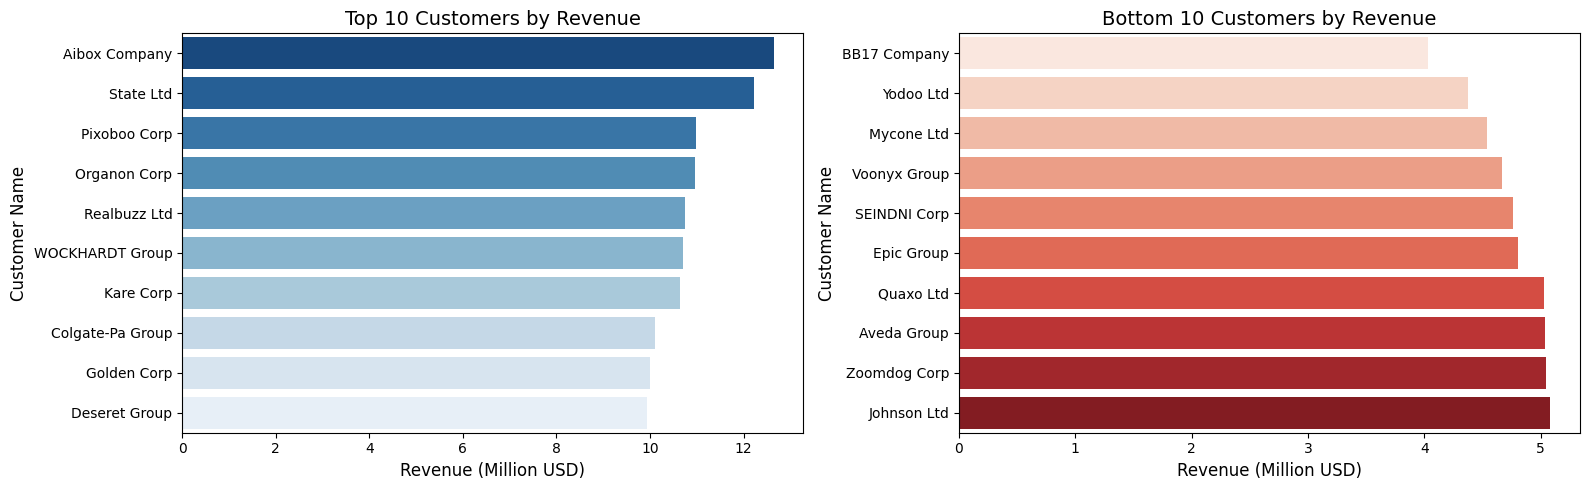

In [91]:
# Calculate total revenue per customer and select top 10
top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=False) # Sort from highest to lowest
      .head(10)                     # Keep top 10 customers
)
display(top_rev)                    # displaying 'top_rev' series with 'customer_name' as Index and 'revenue' as Values

# Calculate total revenue per customer and select bottom 10
bottom_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=True)  # Sort from lowest to highest
      .head(10)                     # Keep bottom 10 customers
)
display(bottom_rev)                 # displaying 'bottom_rev' series with 'customer_name' as Index and 'revenue' as Values

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))       # (1 , 2) -> one row and 2 columns in a 'fig' object and 'axes' is array containing two subplots i.e. two axes objects

# Plot 1: Top 10 customers by revenue (converted to millions)
sns.barplot(
    x=top_rev.values / 1e6,    # X-axis: revenue in millions
    y=top_rev.index,           # Y-axis: customer names
    palette='Blues_r',         # Color palette (reversed blues)
    hue = top_rev.index,       # for safety of future warning from Seaborn
    legend = False,            # no need of legend as y-labels are sufficient
    ax=axes[0]                 # Specifies that this bar plot should be drawn on the first (left) subplot.
)

# labels for axes[0] -> left plot
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)         # Title
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[0].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Plot 2: Bottom 10 customers by revenue (converted to millions)
sns.barplot(
    x=bottom_rev.values / 1e6, # X-axis: revenue in millions
    y=bottom_rev.index,        # Y-axis: customer names
    palette='Reds',            # Color palette (reds)
    hue = bottom_rev.index,
    legend = False,
    ax=axes[1]                 # Specifies that this bar plot should be drawn on the second (right) subplot.
)

# labels for axes[1] -> right plot
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)      # Title
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[1].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Adjust layout to prevent overlap and display both charts
plt.tight_layout()
plt.show()

### INSIGHTS
- Aibox Company tops the list with \$12.64 M, followed closely by State Ltd (\$12.22 M), while the 10th-ranked Deseret Group still contributes \$9.9 M—demonstrating a tight \$10-12 M top tier.

- At the bottom, Johnson Ltd leads its group with \$5.08 M, down to BB17 Company at \$4.03 M—roughly half the top customer's revenue.

- This steep drop from ~\$10 M+ to \$4-5 M highlights high revenue concentration among the top customers.

- Action: prioritize retention and upsell for your top ten, and launch targeted growth campaigns to elevate the lower-revenue cohort.

### 11. Customer Segmentation : Revenue vs Profit Margin

Goal: Segment customers by total revenue and average profit margin, highlighting order volume

Chart: Bubble chart (scatter plot with variable point sizes)

EDA Type: Multivariate

Structure: Scatter points sized by number of orders, plotting revenue vs. margin

,total_revenue,total_profit,avg_profit_margin,orders
customer_name,,,,
ALK-Abello Ltd,7662321.0,2956715.226,38.223881,67
Accord Group,7116927.6,2828208.288,37.945455,55
Accudial Company,5835994.8,2108456.634,36.983607,61
Actavis Company,7074074.4,2863854.834,38.761905,63
Aibox Company,12641251.8,4946556.936,37.860465,86
...,...,...,...,...
Zoonoodle Ltd,6394855.2,2661819.684,39.475410,61
Zooveo Company,7175619.6,2739209.508,37.630769,65
Zoovu Corp,5682109.2,1909049.760,34.576923,52


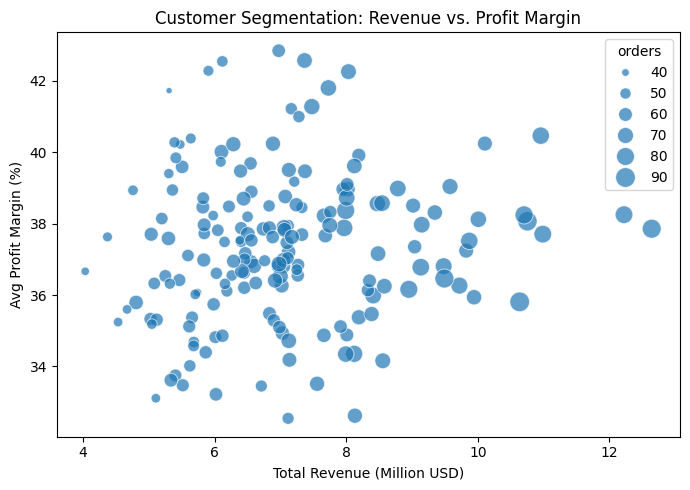

In [98]:
# Aggregate metrics per customer
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_profit_margin=('profit_margin_%', 'mean'),
    orders=('order_number', 'nunique')
)
display(cust_summary)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',                       # <-- use revenue in millions
    y='avg_profit_margin',
    size='orders',                             # The size of each point (bubble) on the scatter plot is determined by the orders column, meaning customers with more orders will have larger bubbles.
    sizes=(20, 200),                           # Defines the range of sizes for the bubbles. The smallest bubble will have a size of 20, and the largest will have a size of 200.
    alpha=0.7                                  # Sets the transparency of the bubbles to 70%. This is useful for overlapping points, allowing you to see clusters more clearly.
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')      # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()

### INSIGHTS

- Customers with >\$10 M in revenue tend to sustain margins between 36-40%, indicating that scale does not significantly erode profitability.
- Most customers cluster within the \$6-10 M range and show stable margins (~34-40%), suggesting consistent pricing in this tier.
- Customers below \$6 M display the widest margin variance (~33-43%), pointing to more volatile cost structures or discounts among smaller accounts.
- Bubble size (order count) increases with revenue, but margin levels appear unaffected—reinforcing revenue as the dominant performance driver over order volume.

### 12. Correlation Heatmap

Goal: Identify relationships among key numeric variables to uncover potential multicollinearity

Chart: Correlation heatmap

EDA Type: Multivariate

Structure: Annotated heatmap with correlation coefficients for selected numeric columns

,order_quantity,unit_price,revenue,total_cost,profit
order_quantity,1.000000,-0.000884,0.335208,0.313221,0.299330
unit_price,-0.000884,1.000000,0.909274,0.864112,0.789708
revenue,0.335208,0.909274,1.000000,0.947951,0.872162
total_cost,0.313221,0.864112,0.947951,1.000000,0.670993
profit,0.299330,0.789708,0.872162,0.670993,1.000000


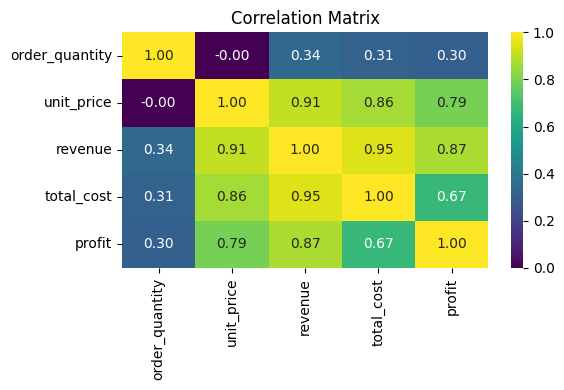

In [99]:
# List numeric columns to include in the correlation calculation
num_cols = ['order_quantity', 'unit_price', 'revenue', 'total_cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()
display(corr)

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis'  # Color palette for the heatmap
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

### INSIGHTS
- **Profit and revenue** are very strongly correlated (0.87), indicating that as sales value increases, profit tends to rise as well.  
- **Unit price** is a key driver: it correlates 0.91 with revenue, 0.79 with profit, and 0.94 with cost—highlighting how pricing decisions ripple through both income and expense figures.  
- **Cost** shows a strong link to revenue (0.85) but a more moderate tie to profit (0.67), underscoring that while higher sales often bring higher expenses, margins can still vary.  
- **Quantity** has virtually no correlation with unit price or cost (≈0.00) and only modest associations with revenue (0.34) and profit (0.30), making volume a secondary factor compared to pricing.

# Saving Pre-Processed DataFrame 'df'

In [48]:
df.to_csv('Sales_data(EDA Exported).csv' , index = False)

# 🔍 **Key-Insights**

- **Monthly Revenue Cycle:**  
  Revenue stays stable between ≈\$23M-\$26.5M across 2014-2017, with no consistent seasonal spikes. Sharpest drop (≈\$21.2M) occurs in early 2017, indicating a possible one-time disruption.

- **Channel Mix:**  
  Wholesale: 54%. Distributors: 31%. Exports: 15% — opportunity to scale international presence.

- **Top Products (Revenue):**  
  Product 26: \$118M; Product 25: \$110M; Product 13: \$78M. Mid-tier: \$68-75M; bottom performers: \$52-57M.

- **Profit Margins:**  
  Profit margins range broadly from ≈18% to ≈60%, with no strong correlation to unit price. Dense horizontal bands( in Bubble chart ) suggest standardized pricing strategies across tiers(different customer segments) coz profit margins are consistent whether you go higher in revenue or order volume coz the driving factor is strategic 'Unit Pricing'.

- **Seasonal Volume:**  
  No strong monthly pattern, but slight volume uptick appears around May-June. Early 2017 dip (≈\$21.2M) may require investigation.

- **Regional Performance:**  
  California leads: ≈\$230M Revenue & 7500+ orders. Illinois/Florida/Texas: ≈\$85M-$110M & ≈3500-4500 orders. NY/Indiana: ≈\$54M & 2000+ orders.

# 💡**Recommendations**

1. **Outlier Strategy:** Exclude or formalize bulk-order and promotional SKUs when calculating averages.  
2. **Margin Uplift:** Apply top-product pricing levers(strategies) to mid/low tiers; cut costs on underperformers( least selling products ).  
3. **Export Growth:** Invest in targeted overseas marketing and distributor partnerships.
4. **Regional Investment:** Replicate California's success in other regions and boost marketing in the Northeast & Midwest.
5. **Seasonal Planning:** Shift spend toward January through and May-June peak; investigate the 2017 anomaly.
6. **SKU Optimzation :** Double down on top products i.e. 26 & 25 and re-evaluate pricing or phase out(slowly stop making or selling) low-margin SKUs.
6. **Dashboard Prep:** Build aggregated tables for time series, channel mix and product performance for Power BI.  